Distribution center:\
We can characterize the center of data sample in two ways:
1. By their value.
2. By their rank (e.g. position in a sorted list)

Mean:
$$ \bar x =\frac{\sum_{i=1}^{n} x_i}{n}$$

In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [29]:
x = np.arange(10)
print(np.mean(x))

xWithNan = np.hstack((x,np.nan))#now we append NaN to vector x
print(np.mean(xWithNan))#if we try to calculate regular mean from data with NaNs it will return NaN
print(np.nanmean(xWithNan))#np.nanmean allows us to ignore NaNs in data and calculate mean of the other values

4.5
nan
4.5


Median:\
Median is the value that comes half-way when the data are ranked in order. It is not affected by outliers, in contrast to mean.

In [30]:
x = [1,2,3,4,4,4,5,6,8]
y = [1,2,3,4,4,4,5,6,7]
print(np.mean(y)) #if data is distributed symmetrically, median is equal to mean
print(np.median(y))

print(np.median(x))
xWithNan = np.hstack((x,np.nan))
print(np.median(xWithNan))#similarly to mean, it can't be calculated with the basic function if data contains NaNs
print(np.nanmedian(xWithNan))


4.0
4.0
4.0
nan
4.0


Mode:\
Mode is the value in a data set that occurs most frequently.

In [31]:
x = [1,2,3,4,4,5,6]
print(stats.mode(x)) #stats.mode() returns an array where [0]=mode, [1]=count of mode
print(stats.mode(x)[0])
print(stats.mode(x)[1])

ModeResult(mode=4, count=2)
4
2


Quantifying variability:\
Range:\
Range is a difference between max and min values from the data set.\
When calculating range we should watch out for outliers. Such points are often caused by errors in the selection of the sample or in the measurements. 

In [32]:
x = np.arange(10)
print(np.ptp(x)) #ptp stands for peak-to-peak

9


Centils:\
To understand percentils we should look at Cumulative Distribution Function (CDF) first:
$$ CDF(x)=\int_{-\infty}^{x}PDF(x)dx$$

Text(0, 0.5, 'CDF(x)')

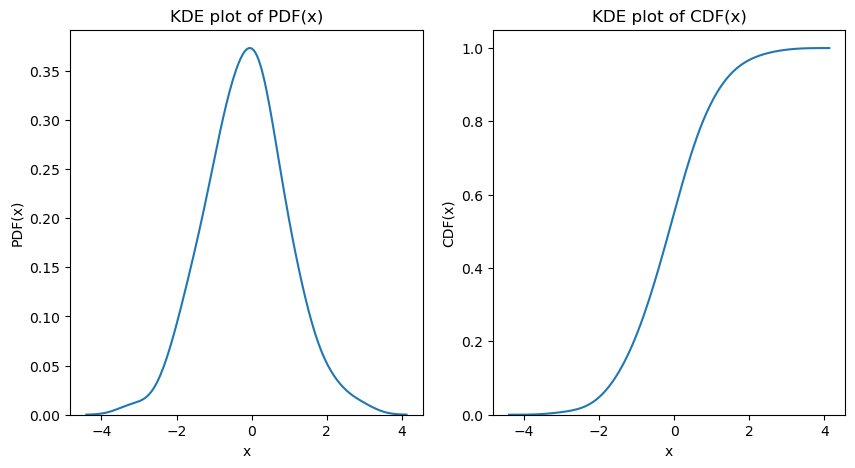

In [33]:
np.random.seed(12)
x = np.random.normal(0,1,100)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].set_title("KDE plot of PDF(x)")
axes[1].set_title("KDE plot of CDF(x)")
sns.kdeplot(x,ax=axes[0])
axes[0].set_xlabel("x")
axes[0].set_ylabel("PDF(x)")
sns.kdeplot(x,ax=axes[1],cumulative=True)
axes[1].set_xlabel("x")
axes[1].set_ylabel("CDF(x)")

CDF is an integral from minus infinity to the certain value and it specifies the percentage of data that lie below this value.\
It also allows to calculate how much data lie between two points:
$$P(a\leq X \leq b)=\int_{a}^{b}PDF(x)=CDF(b)-CDF(a)$$

Centiles are an inverse of CDF - they show the value below which certain percentage of data occur. 

[-1.52955907  1.10734015]


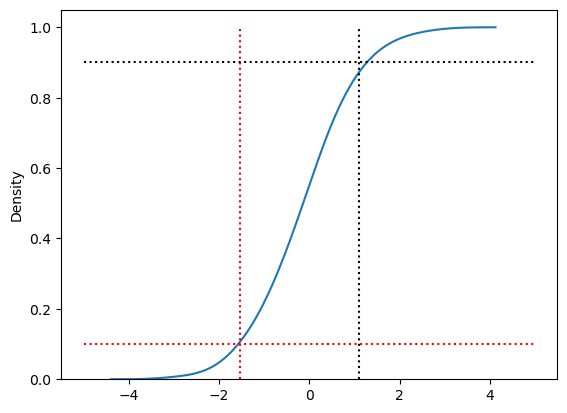

In [34]:
sns.kdeplot(x,cumulative=True)
plt.vlines(x=[np.percentile(x,[10,90])],ymin=0,ymax=1,colors=["red","black"],linestyles="dotted") #lines showcasing given centiles
plt.hlines(y=[0.1,0.9],xmin=-5,xmax=5,colors=["red","black"],linestyles="dotted")
print(np.percentile(x,[10,90]))#np.percentile(data,centiles)

Standard deviation and variance:\
$\sigma = \text{variance from the population}$\
$S=\text{variance from the sample}$, is an estimator of population variance.\
The best unbiased estimator for the population variance is given by 
$var(x) = \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$ and is reffered to as sample variance.\
Standard deviation is the square root of the variance: $S = \sqrt{var}$.


In [42]:
x = np.arange(7,14)
print(np.std(x)) #in numpy std is calculated with "n"
print(np.std(x,ddof=1)) #to obtaine the sample variance (with n-1) we must add argument ddof=1
df = pd.DataFrame({"x":x})
print(df.std()) #in pandas std is by default calculated with ddof=1

2.0
2.160246899469287
x    2.160247
dtype: float64


Standard error:\
Standard error is the estimate of the standard deviation of the coefficient (e.g. mean, correlation etc.) [Błąd standardowy danej statystyki, np. średniej, to odchylenie standardowe rozkładu tej wartości z prób].\
For normally distributed data, the sample standard error for of the mean (SE or SEM) is given by:
$$SEM= \frac{s}{\sqrt{n}} = \frac{\sum_{i=1}^{n}(x_i - \bar x)^2}{n-1} * \frac{1}{\sqrt{n}}$$

Condifence Intervals:\
The $\alpha \% \text{ confidence interval (CI)}$ reports the range that contains the true value of a parameter with likelihood of a $\alpha \%$.\
If the sampling distribution is symmetrical and unimodal (it has one mode, one peak), it will often be possible to approximate the condifence interval by:
$$ CI = mean \pm std * N_{PPF}\left(\frac{1-\alpha}{2}\right) $$
where $N_{PPF}$ is the percentile point function for standard normal distribution.\
If the distribution is skewed above equation is not appropriate and doesn't provide the correct confidence intervals.\
\
To calculate the confidence interval of the mean value, the standard deviation must be replaced by standard error of the mean:
$$CI_{\text{for mean}} = mean \pm SEM * N_{PPF}\left(\frac{1-\alpha}{2}\right)$$

Text(0.5, 1.0, 'Bimodal data (sum of unimodals)')

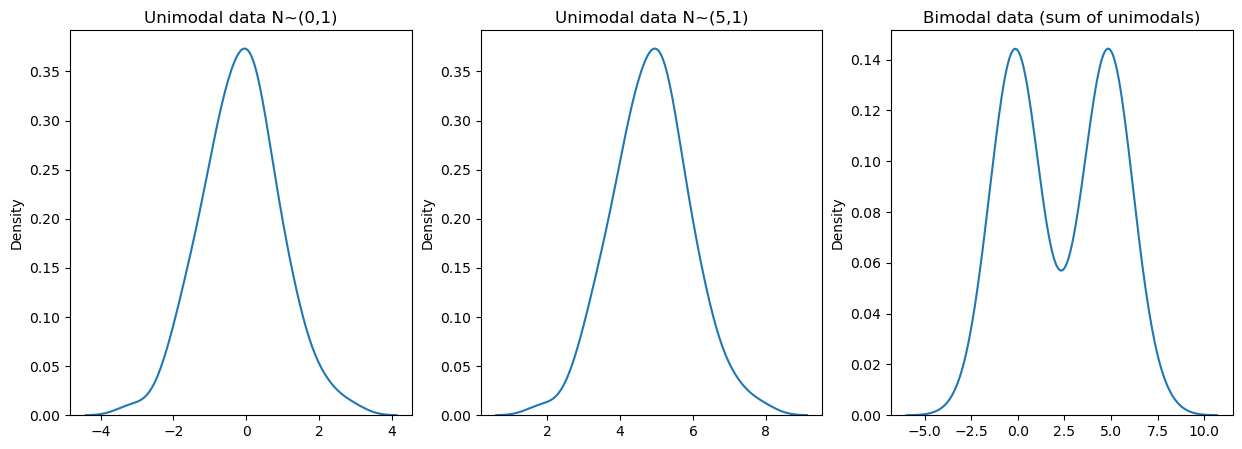

In [59]:
np.random.seed(12) #set seed
unimodal_data1 = np.random.normal(0,1,100) #create first data set ~N(0,1)
np.random.seed(12)
unimodal_data2 = np.random.normal(5,1,100) #create second data set N~(5,1)
bimodal_data = np.append(unimodal_data1,unimodal_data2) #bimodal data being the sum of two previous data sets
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(unimodal_data1,ax=axes[0])
axes[0].set_title("Unimodal data N~(0,1)")
sns.kdeplot(unimodal_data2,ax=axes[1])
axes[1].set_title("Unimodal data N~(5,1)")
sns.kdeplot(bimodal_data,ax=axes[2])
axes[2].set_title("Bimodal data (sum of unimodals)")

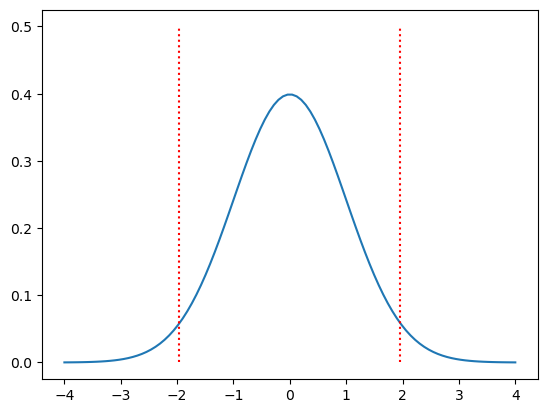

In [65]:
mu = 0 #set mean for normal distribution
sigma = 1 #set std for normal distribution
myDistribution = stats.norm(mu,sigma) #create normal distribution 
significanceLevel = 0.05 #set significance level (alpha)
CI = myDistribution.ppf([significanceLevel/2, 1-significanceLevel/2]) #calculate confidence intervals for given distribution
#it means that 1-alpha, so 95% of data, in this distribution is located between calculated values
plt.plot(np.linspace(-4,4,100),stats.norm.pdf(np.linspace(-4,4,100),loc=0,scale=1)) #loc=mean, scale=std
plt.vlines(x=[CI[0],CI[1]],ymin=0,ymax=0.5,colors="red",linestyles="dotted")